### The following code will generate the plots associated with comparing the performance of the OWL against human scorers

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, linregress
from statistics import mean, stdev
from math import sqrt

In [47]:
#combined.to_csv('C:/Users/Emily/Desktop/UL_analysis/S1_manual_counts/20220215_combined.csv')
combined = pd.read_csv('C:/Users/Emily/Desktop/UL_analysis/S1_manual_counts/20220215_combined.csv', index_col=0)
counts = pd.read_csv('C:/Users/Emily/Desktop/UL_analysis/Manual vs OWL counts.csv', index_col=0)
hva = counts.iloc[:, 0:9].copy() 

### Total Worms: (H1,H2) vs OWL

1. Calculating regression stats for total worms counted by Humans vs OWL

In [48]:
h1_counts = hva['Person1_Count']
h2_counts = hva['Person2_Count']
OWL_counts = hva['OWL_Count']

h1c_df = pd.DataFrame(list(zip(OWL_counts, h1_counts)),
               columns =['OWL', 'Human']).dropna()

h2c_df = pd.DataFrame(list(zip(OWL_counts, h2_counts)),
               columns =['OWL', 'Human']).dropna()
longc = h1c_df.append(h2c_df)


slope, intercept, r_value, p_value, std_err = linregress(longc['Human'], longc['OWL'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.5194478243710937 39.713378430356016 0.9011659862826732 1.2417592965088699e-14 0.04164368226154043
R-squared: 0.812100


2. Calculating regression stats for total worms counted between humans: H1 vs H2

In [51]:
h1h2 = pd.DataFrame(list(zip(h1_counts, h2_counts)),
               columns =['H1', 'H2']).dropna()

slope, intercept, r_value, p_value, std_err = linregress(h1h2['H1'], h1h2['H2'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.8458484000557978 74.73390549191976 0.9097637723875345 6.696076439924178e-08 0.09360945644872014
R-squared: 0.827670


3. Generating the regression plot comparing the total worm counts for Humans v OWL and H1 v H2

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


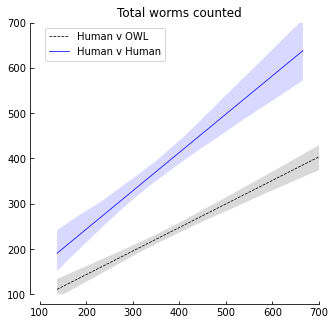

In [49]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.regplot(longc['Human'], longc['OWL'], scatter=False,
    fit_reg = True, color = 'black', label='Human v OWL', line_kws={'linewidth':.75, 'linestyle': '--'})
ax = sns.regplot(hva['Person1_Count'], hva['Person2_Count'], scatter=False,
    fit_reg = True, color = 'blue', label='Human v Human' ,line_kws={'linewidth':.75})

ax.set_xlabel('')
ax.set_ylabel('')
ax.set(xlim=(100,700), ylim=(100, 700), title='Total worms counted')
ax.tick_params(axis="both",direction="in")
sns.despine(offset=10)
ax.legend()
#plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_totalwrms.svg')

4. Generating residual plots for the linear regressions above

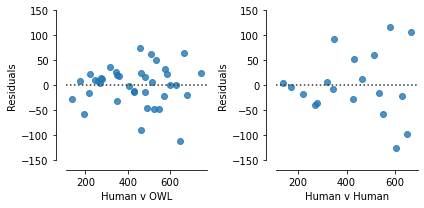

In [64]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,3), nrows=1, ncols=2)

sns.residplot(longc['Human'], longc['OWL'], ax=ax1)
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Human v OWL')
ax1.set_ylim(-150,150)

sns.residplot(hva['Person1_Count'], hva['Person2_Count'], ax=ax2)

ax2.set_ylabel('Residuals')
ax2.set_xlabel('Human v Human')
ax2.set_ylim(-150,150)

sns.despine(offset=10)
fig.tight_layout()
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_totalwrms_resids.svg')

### Mean position: (H1, H2) vs OWL

1. Generating a dataframe of the mean worm position for each scoring regime

In [52]:
g = combined.groupby(['FileName', 'Counter']).mean().reset_index()
h1 = g.loc[g['Counter']=='H1']['X']
h2 = g.loc[g['Counter']=='H2']['X']
OWL = g.loc[g['Counter']=='Auto']['X']

xs = pd.DataFrame(list(zip(OWL, h1, h2)),
               columns =['OWL', 'H1', 'H2'])

2. Calculating the regressions stats comparing the mean position between two human scorers (H1 v H2)

In [53]:
slope, intercept, r_value, p_value, std_err = linregress(xs['H1'], xs['H2'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.9964597099691599 -0.08452613285382693 0.9961257883029415 2.15276226628817e-19 0.02133569164122456
R-squared: 0.992267


3. Generating the regression stats comparing mean position between humans (H1, H2) and OWL

In [54]:
h1_df = pd.DataFrame(list(zip(OWL, h1)),
               columns =['OWL', 'Human'])

h2_df = pd.DataFrame(list(zip(OWL, h2)),
               columns =['OWL', 'Human'])
long = h1_df.append(h2_df)

slope, intercept, r_value, p_value, std_err = linregress(long['Human'], long['OWL'])
print(slope, intercept, r_value, p_value, std_err)
rsqrd = print(f"R-squared: {r_value**2:.6f}")

0.774261178490022 -0.12350559860479393 0.9782553619582498 3.429496328466577e-26 0.027359065808229457
R-squared: 0.956984


4. Plotting the regression analysis

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


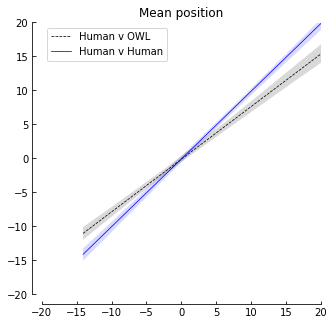

In [55]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.regplot(long['Human'], long['OWL'], scatter = False,
    fit_reg = True, color = 'black', label="Human v OWL",line_kws={'linewidth':.75, 'linestyle':'--'})
ax = sns.regplot(xs['H1'], xs['H2'], scatter = False,
    fit_reg = True, color = 'blue', label="Human v Human", line_kws={'linewidth':.75})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set(xlim=(-20,20), ylim=(-20, 20), title='Mean position')
ax.tick_params(axis="both",direction="in")
ax.legend()
sns.despine(offset=10)
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_mnX.svg')

5. Plotting the residiuals for the regression above

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


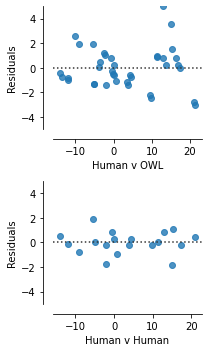

In [60]:
fig, (ax1, ax2) = plt.subplots(figsize=(3,5), nrows=2, ncols=1)

sns.residplot(long['Human'], long['OWL'], ax=ax1)
ax1.set_ylabel('Residuals')
ax1.set_xlabel('Human v OWL')
ax1.set_ylim(-5,5)

sns.residplot(xs['H1'], xs['H2'], ax=ax2)

ax2.set_ylabel('Residuals')
ax2.set_xlabel('Human v Human')
ax2.set_ylim(-5,5)

sns.despine(offset=10)
fig.tight_layout()
plt.savefig('C:/Users/Emily/Desktop/NPScreen_figs/HvO_mnX_resids.svg')

## Density curves comparing worm locations identified by H1, H2 and OWL

In [16]:
subs = ['loc_S1_005_1C', 'loc_S1_010_2D', 'loc_S1_004_2D', 'loc_S1_004_2B']
subs_df = combined.loc[combined['FileName'].isin(subs)]

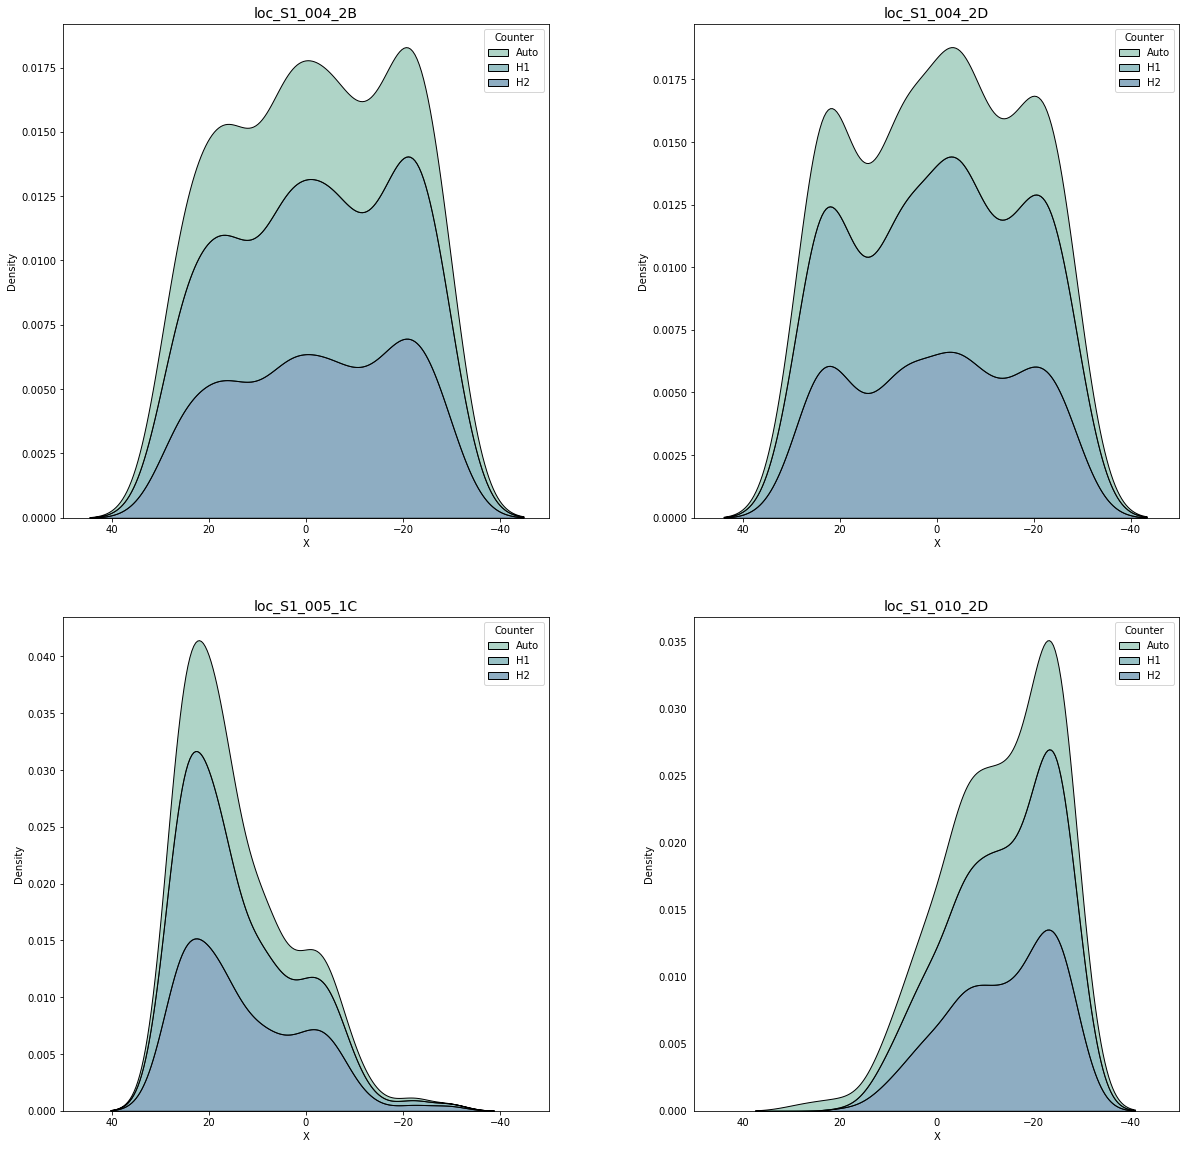

In [17]:
subs_grouped = subs_df.groupby('FileName')

font = {'weight':'normal', 'size':10}


f, ax = plt.subplots(nrows=2, ncols=2,
                        figsize=(20, 20),
                        gridspec_kw={'wspace': 0.30},
                       )
i=0

for n, g in subs_grouped:
    fname = g['FileName'].unique()[0]
    plt.tick_params(left=False, bottom=False)
    plt.rc('axes', titlesize=14)     # fontsize of the axes title
    plt.rc('font', **font)

    #sns.displot(data=g, x="X", hue="Counter", kind="kde", label='FileName', fill=True, ax=ax.flat[i])
    sns.kdeplot(data=g, x="X", hue="Counter", fill=True, ax=ax.flat[i], multiple="stack", alpha=.5, palette="crest").set(title = fname, 
                xlim = (50,-50))
    i += 1

    plt.rcParams['svg.fonttype'] = 'none'

#plt.savefig('C:/Users/Emily/Desktop/UL_analysis/subset_hva.svg')